In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

In [2]:
# Load dataset
newsgroups = fetch_20newsgroups(subset='all', categories=['rec.sport.baseball', 'sci.space', 'rec.autos'], shuffle=True, random_state=42)

In [3]:
len(newsgroups.target)

2971

In [4]:
newsgroups.data[0]

"From: palmer@cco.caltech.edu (David M. Palmer)\nSubject: Re: HST Servicing Mission Scheduled for 11 Days\nOrganization: California Institute of Technology, Pasadena\nLines: 30\nNNTP-Posting-Host: alumni.caltech.edu\n\nprb@access.digex.net (Pat) writes:\n\n>In article <C6A2At.E9z@zoo.toronto.edu> henry@zoo.toronto.edu (Henry Spencer) writes:\n>>\n>>No, the thing is designed to be retrievable, in a pinch.  Indeed, this\n>>dictated a rather odd design for the solar arrays, since they had to be\n>>retractable as well as extendable, and may thus have indirectly contributed\n>>to the array-flapping problems.\n\n\n>Why not design the solar arrays to be detachable.  if the shuttle is going\n>to retunr the HST,  what bother are some arrays.  just fit them with a quick\n> release.  one  space walk,  or use the second canadarm to remove the arrays.\n\nYou may want to put Hubble back in the payload bay for a reboost,\nand you don't want to clip off the panels each time.\n\nFor the Gamma-Ray Obser

In [5]:
newsgroups.target[0]

np.int64(2)

In [6]:
X = newsgroups.data
y = newsgroups.target

In [7]:
print(len(X), len(y))

2971 2971


In [8]:
# Create a DataFrame for easy manipulation
df = pd.DataFrame({'text': X, 'label': y})
df.head()

,text,label
0,From: palmer@cco.caltech.edu (David M. Palmer)...,2
1,From: mebonar@sn01.sncc.lsu.edu (MsciDave)\nSu...,1
2,From: prb@access.digex.net (Pat)\nSubject: Re:...,2
3,From: buck@granite.ma30.bull.com (Ken Buck)\nS...,0
4,From: hagenjd@wfu.edu (Jeff Hagen)\nSubject: B...,0


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [10]:
# Transform the text data to feature vectors
X_vect = vectorizer.fit_transform(df['text'])

In [11]:
# Labels
y = df['label']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.3, random_state=42)

In [14]:
X_train.shape

(2079, 34505)

In [15]:
X_test.shape

(892, 34505)

In [16]:
# Initialize and train the classifier
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [17]:
from sklearn.metrics import accuracy_score, classification_report

In [18]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [19]:
y_pred

array([2, 2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 2,
       2, 1, 1, 2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1,
       2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 2,
       0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 0,
       0, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 1,
       0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0,
       0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0,
       2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0,

In [20]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=newsgroups.target_names)

In [21]:
print(f'Accuracy: {accuracy*100:.2f}%')
print('Classification Report:')
print(report)

Accuracy: 98.09%
Classification Report:
                    precision    recall  f1-score   support

         rec.autos       0.97      0.99      0.98       315
rec.sport.baseball       0.97      0.98      0.97       274
         sci.space       1.00      0.98      0.99       303

          accuracy                           0.98       892
         macro avg       0.98      0.98      0.98       892
      weighted avg       0.98      0.98      0.98       892



In [22]:
def predict_category(text):
    """
    Predict the category of a given text using the trained classifier.
    """
    text_vec = vectorizer.transform([text])
    prediction = clf.predict(text_vec)
    return newsgroups.target_names[prediction[0]]

# Example usage
sample_text = "NASA announced the discovery of new exoplanets."
predicted_category = predict_category(sample_text)
print(f'The predicted category is: {predicted_category}')

The predicted category is: sci.space


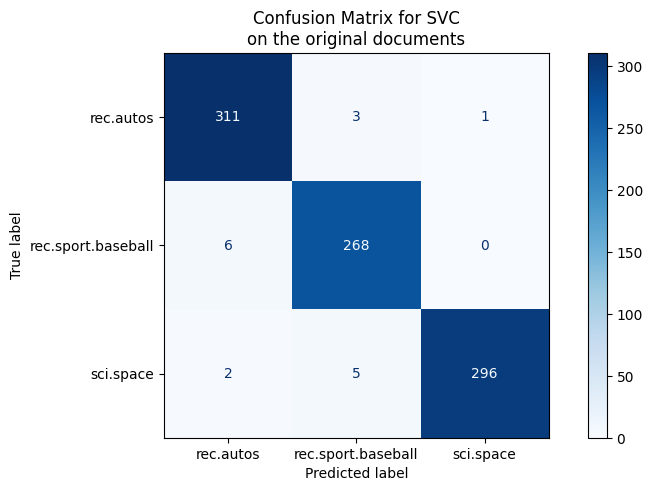

In [27]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay # C.M.

target_names = newsgroups.target_names

fig, ax = plt.subplots(figsize=(10, 5))
# Se cambió el cmap de viridis a Blues. Este cmap es el más común en C.M.
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the original documents"
)
plt.show()